In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
mnist란 미국 국립표준기술연구소의 손으로 쓴 글자 데이터셋에서 숫자만 뽑아낸 데이터셋입니다.

In [2]:
import os
path = os.path.join(os.getcwd(), 'mnist.npz')

(train_data, train_label), (test_data, test_label) = tf.keras.datasets.mnist.load_data(path)

MNIST 데이터셋의 train 데이터셋은 60000개, test 데이터셋은 10000개입니다.

In [3]:
print(train_data.shape)
print(train_label)
print('-'*27)
print(test_data.shape)
print(test_label)

(60000, 28, 28)
[5 0 4 ... 5 6 8]
---------------------------
(10000, 28, 28)
[7 2 1 ... 4 5 6]


# MNIST 데이터셋 maplotlib를 이용한 이미지 확인

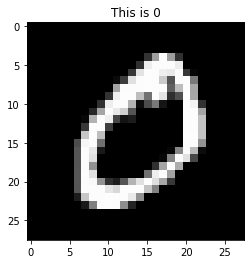

In [4]:
def show_img(i):
    plt.title('This is {}'.format(train_label[i]))
    plt.imshow(train_data[i], cmap='gray')
    plt.show()
show_img(1)

# 데이터 전처리(Data Preprocessing)

tensorflow는 shape이 [batch_size, height, width, color_channel] 으로 되어야합니다.

In [5]:
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

In [6]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_label = tf.keras.utils.to_categorical(train_label, 10)
test_label = tf.keras.utils.to_categorical(test_label, 10)

In [7]:
learning_rate = 0.001
batch_size = 128
train_dataset_num = len(train_data) // batch_size

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_label)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_data)).\
    batch(len(test_data), drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

# DNN 모델 만들기

In [8]:
weight = tf.keras.initializers.RandomNormal()
label_dim = 10

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, use_bias=True, kernel_initializer=weight))
model.add(tf.keras.layers.Activation(tf.keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(units=512, use_bias=True, kernel_initializer=weight))
model.add(tf.keras.layers.Activation(tf.keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight))

# DNN 학습 하기

In [9]:
epoch = 1
for i in range(epoch):
    for idx, (train_x, train_y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(train_x, training=True)
            loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=train_y, from_logits=True))
            
        grads = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

        prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(train_y, -1))
        accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32)) * 100

        print('Epoch: {:5}, Process: {:5}/{}, Loss: {:5.5f}, Accuracy: {:5.1f}%'.format(i, idx, train_dataset_num, loss, accuracy))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch:     0, Process:     0/468, Loss: 2.49096, Accuracy:   7.8%
Epoch:     0, Process:     1/468, Loss: 2.32250, Accuracy:   8.6%
Epoch:     0, Process:     2/468, Loss: 2.34287, Accuracy:  12.5%
Epoch:     0, Process:     3/468, Loss: 2.34698, Accuracy:  16.4%
Epoch:     0, Process:     4/468, Loss: 2.37297, Accuracy:   7.0%
Epoch:     0, Process:     5/468, Loss: 2.38250, Accuracy:   6.2%
Epoch:     0, Process:     6/468, Loss: 2.20438, Accuracy:  37.5%
Epoch:     0, Process:     7/468, Loss: 2.2709

Epoch:     0, Process:   120/468, Loss: 0.50778, Accuracy:  85.9%
Epoch:     0, Process:   121/468, Loss: 0.60069, Accuracy:  85.2%
Epoch:     0, Process:   122/468, Loss: 0.46782, Accuracy:  86.7%
Epoch:     0, Process:   123/468, Loss: 0.46442, Accuracy:  88.3%
Epoch:     0, Process:   124/468, Loss: 0.51394, Accuracy:  86.7%
Epoch:     0, Process:   125/468, Loss: 0.55016, Accuracy:  84.4%
Epoch:     0, Process:   126/468, Loss: 0.44166, Accuracy:  85.2%
Epoch:     0, Process:   127/468, Loss: 0.39408, Accuracy:  89.1%
Epoch:     0, Process:   128/468, Loss: 0.48563, Accuracy:  90.6%
Epoch:     0, Process:   129/468, Loss: 0.51464, Accuracy:  85.2%
Epoch:     0, Process:   130/468, Loss: 0.54273, Accuracy:  86.7%
Epoch:     0, Process:   131/468, Loss: 0.51101, Accuracy:  87.5%
Epoch:     0, Process:   132/468, Loss: 0.48657, Accuracy:  88.3%
Epoch:     0, Process:   133/468, Loss: 0.44462, Accuracy:  88.3%
Epoch:     0, Process:   134/468, Loss: 0.41430, Accuracy:  89.1%
Epoch:    

Epoch:     0, Process:   251/468, Loss: 0.42326, Accuracy:  85.2%
Epoch:     0, Process:   252/468, Loss: 0.24672, Accuracy:  93.8%
Epoch:     0, Process:   253/468, Loss: 0.35119, Accuracy:  89.1%
Epoch:     0, Process:   254/468, Loss: 0.32800, Accuracy:  88.3%
Epoch:     0, Process:   255/468, Loss: 0.27105, Accuracy:  92.2%
Epoch:     0, Process:   256/468, Loss: 0.38790, Accuracy:  89.8%
Epoch:     0, Process:   257/468, Loss: 0.41271, Accuracy:  89.1%
Epoch:     0, Process:   258/468, Loss: 0.25693, Accuracy:  93.0%
Epoch:     0, Process:   259/468, Loss: 0.44515, Accuracy:  89.1%
Epoch:     0, Process:   260/468, Loss: 0.33898, Accuracy:  92.2%
Epoch:     0, Process:   261/468, Loss: 0.24733, Accuracy:  94.5%
Epoch:     0, Process:   262/468, Loss: 0.28666, Accuracy:  89.8%
Epoch:     0, Process:   263/468, Loss: 0.33736, Accuracy:  89.1%
Epoch:     0, Process:   264/468, Loss: 0.28137, Accuracy:  90.6%
Epoch:     0, Process:   265/468, Loss: 0.34693, Accuracy:  89.1%
Epoch:    

Epoch:     0, Process:   384/468, Loss: 0.22630, Accuracy:  93.0%
Epoch:     0, Process:   385/468, Loss: 0.24672, Accuracy:  91.4%
Epoch:     0, Process:   386/468, Loss: 0.34202, Accuracy:  90.6%
Epoch:     0, Process:   387/468, Loss: 0.38108, Accuracy:  87.5%
Epoch:     0, Process:   388/468, Loss: 0.27226, Accuracy:  90.6%
Epoch:     0, Process:   389/468, Loss: 0.34362, Accuracy:  89.8%
Epoch:     0, Process:   390/468, Loss: 0.14030, Accuracy:  96.1%
Epoch:     0, Process:   391/468, Loss: 0.28614, Accuracy:  91.4%
Epoch:     0, Process:   392/468, Loss: 0.37311, Accuracy:  91.4%
Epoch:     0, Process:   393/468, Loss: 0.30520, Accuracy:  91.4%
Epoch:     0, Process:   394/468, Loss: 0.35189, Accuracy:  87.5%
Epoch:     0, Process:   395/468, Loss: 0.28378, Accuracy:  91.4%
Epoch:     0, Process:   396/468, Loss: 0.18660, Accuracy:  96.1%
Epoch:     0, Process:   397/468, Loss: 0.35266, Accuracy:  91.4%
Epoch:     0, Process:   398/468, Loss: 0.27233, Accuracy:  92.2%
Epoch:    

# DNN 예측 하기

In [10]:
for test_x, test_y in test_dataset:
    logits = model(test_x, training=False)
    comparison = tf.equal(tf.argmax(logits, -1), tf.argmax(test_y, -1))
    accuracy = tf.reduce_mean(tf.cast(comparison, tf.float32)) * 100
print('Test accuracy:', accuracy)

Test accuracy: tf.Tensor(92.67, shape=(), dtype=float32)


In [11]:
print(tf.argmax(model(test_data)[1]))
print(test_label[1])

tf.Tensor(2, shape=(), dtype=int64)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


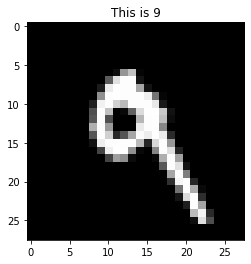

In [12]:
def show_img(i):
    plt.title('This is {}'.format(tf.argmax(test_label[i])))
    plt.imshow(np.squeeze(test_data[i], -1), cmap='gray')
    plt.show()
show_img(7)